In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Upload kaggle API key file
uploaded = files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v
!kaggle datasets download -d moltean/fruits

In [0]:
!unzip \*.zip

In [0]:
import numpy as np
import pandas as pd 
import os

In [4]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
IMAGE_WIDTH=100
IMAGE_HEIGHT=100
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [0]:
train_path="/content/fruits-360/Training"
test_path="/content/fruits-360/Test"

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./255)


In [0]:
!mkdir '/content/val'

In [8]:
import os

inputpath = '/content/fruits-360/Training/'
outputpath = '/content/val/'

for dirpath, dirnames, filenames in os.walk(inputpath):
    structure = os.path.join(outputpath, dirpath[len(inputpath):])
    if not os.path.isdir(structure):
        os.mkdir(structure)
    else:
        print("Folder does already exits!")

Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
Folder does already exits!
F

In [0]:
from glob import glob
import shutil
for x in os.listdir('/content/fruits-360/Training/'):
    images = []
    for y in glob('/content/fruits-360/Training/'+x+'/*'):
        images.append(y)
    shutil.move(images[-1],'/content/val/'+x)
    del images

In [10]:
train_generator=train_datagen.flow_from_directory(train_path,
                                                  target_size=IMAGE_SIZE,
                                                  batch_size=20,
                                                  class_mode="categorical"
                                                 )
test_generator=test_datagen.flow_from_directory(test_path,
                                                  target_size=IMAGE_SIZE,
                                                  batch_size=20,
                                                  class_mode="categorical"
                                                 )

Found 67430 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


# **CNN Implementation**

In [0]:
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization 
from tensorflow.python.keras import Sequential 
model = Sequential() 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 

model.add(Conv2D(64, (3, 3),padding='same', activation='relu')) 
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 

#model.add(Conv2D(128, (3, 3),padding='same', activation='relu')) 
#model.add(BatchNormalization()) 
#model.add(MaxPooling2D(pool_size=(2, 2))) 
#model.add(Dropout(0.25)) 

#model.add(Conv2D(128, (3, 3),padding='same', activation='relu')) 
#model.add(BatchNormalization()) 
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25)) 

model.add(Conv2D(128, (3, 3),padding='same', activation='relu')) 
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 

model.add(Conv2D(256, (3, 3),padding='same', activation='relu')) 
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 

model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dropout(0.5))

model.add(Dense(131, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [0]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
checkpointer = ModelCheckpoint(filepath='weights1.h5', verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)

In [0]:
callbacks = [earlystop, learning_rate_reduction,checkpointer]

In [16]:
epochs=30
history = model.fit_generator(train_generator,validation_data=test_generator,
                              steps_per_epoch=100,
                              epochs=epochs,
                              validation_steps=50,
                              verbose=1,callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
 99/100 [============================>.] - ETA: 0s - loss: 4.3230 - accuracy: 0.0848
Epoch 00001: val_accuracy improved from -inf to 0.01200, saving model to weights1.h5
100/100 [==============================] - 5s 51ms/step - loss: 4.3204 - accuracy: 0.0855 - val_loss: 7.5303 - val_accuracy: 0.0120 - lr: 0.0010
Epoch 2/30
 99/100 [============================>.] - ETA: 0s - loss: 3.3991 - accuracy: 0.2096
Epoch 00002: val_accuracy improved from 0.01200 to 0.01300, saving model to weights1.h5
100/100 [==============================] - 5s 47ms/step - loss: 3.3963 - accuracy: 0.2095 - val_loss: 12.6627 - val_accuracy: 0.0130 - lr: 0.0010
Epoch 3/30
 99/100 [============================>.] - ETA: 0s - loss: 2.7856 - accuracy: 0.3313
Epoch 00003: val_accuracy improved from 0.01300 to 0.01600, saving model to weights1.h5
100/100 [==============================] - 5s 47ms/step - loss: 2.7831 - accuracy: 0

In [0]:
model.load_weights("weights1.h5")

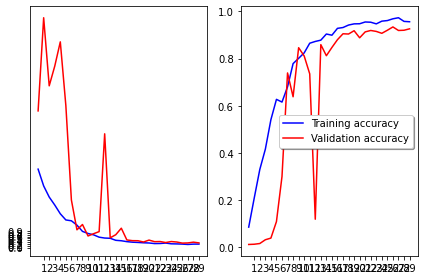

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
#Simple CNN implementation gave an accuracy of around 95.3%

# **Transfer Learning Implementation**

InceptionV3

In [19]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

--2020-06-02 04:50:01--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   156MB/s    in 0.5s    

2020-06-02 04:50:01 (156 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (131, activation='softmax')(x)           

model1 = Model( pre_trained_model.input, x) 

model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
epochs=30
history = model1.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=100,
                              epochs=epochs,
                              validation_steps=50,
                              verbose=1,callbacks=callbacks)

Epoch 1/30
 99/100 [============================>.] - ETA: 0s - loss: 3.0636 - accuracy: 0.4040
Epoch 00001: val_accuracy did not improve from 0.93400
100/100 [==============================] - 6s 59ms/step - loss: 3.0493 - accuracy: 0.4065 - val_loss: 1.6808 - val_accuracy: 0.6030 - lr: 0.0010
Epoch 2/30
 99/100 [============================>.] - ETA: 0s - loss: 0.9663 - accuracy: 0.7303
Epoch 00002: val_accuracy did not improve from 0.93400
100/100 [==============================] - 5s 48ms/step - loss: 0.9675 - accuracy: 0.7305 - val_loss: 1.0611 - val_accuracy: 0.7140 - lr: 0.0010
Epoch 3/30
 99/100 [============================>.] - ETA: 0s - loss: 0.5252 - accuracy: 0.8444
Epoch 00003: val_accuracy did not improve from 0.93400
100/100 [==============================] - 5s 48ms/step - loss: 0.5271 - accuracy: 0.8435 - val_loss: 0.5961 - val_accuracy: 0.8400 - lr: 0.0010
Epoch 4/30
 99/100 [============================>.] - ETA: 0s - loss: 0.3619 - accuracy: 0.8949
Epoch 00004: val

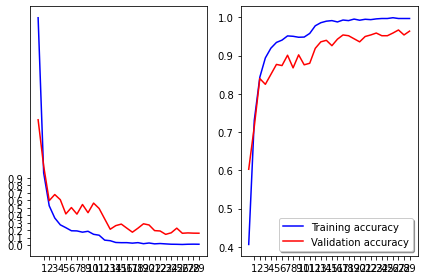

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
#InceptionV3 overfits the data and cannot be used.

VGG16

In [0]:
from keras.applications.vgg16 import VGG16

In [0]:
import tensorflow as tf
model2 = tf.keras.applications.VGG16(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    pooling='max'
)


    
#for layers in model2.layers:
#    layers_trainable = False

#model2.add(Dense(131, activation = "softmax"))

In [0]:
for layer in model2.layers:
  layer.trainable = False

last_layer = model2.get_layer('block5_pool')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (131, activation='softmax')(x) 

model2 = Model( model2.input, x)

In [0]:
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
epochs=30
history = model2.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=100,
                              epochs=epochs,
                              validation_steps=50,
                              verbose=1,callbacks=callbacks)

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 4.1685 - accuracy: 0.1540
Epoch 00001: val_accuracy did not improve from 0.96700
100/100 [==============================] - 10s 104ms/step - loss: 4.1685 - accuracy: 0.1540 - val_loss: 3.2670 - val_accuracy: 0.2580 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 2.5306 - accuracy: 0.4140
Epoch 00002: val_accuracy did not improve from 0.96700
100/100 [==============================] - 10s 101ms/step - loss: 2.5306 - accuracy: 0.4140 - val_loss: 2.0761 - val_accuracy: 0.5150 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 1.6779 - accuracy: 0.5800
Epoch 00003: val_accuracy did not improve from 0.96700
100/100 [==============================] - 10s 101ms/step - loss: 1.6779 - accuracy: 0.5800 - val_loss: 1.5449 - val_accuracy: 0.6580 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 1.1113 - accuracy: 0.7275
Epoch 0000

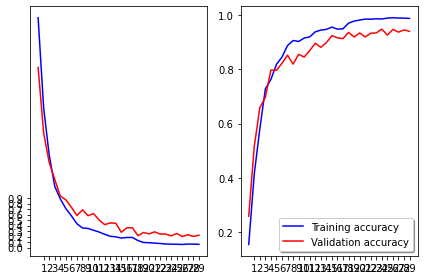

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
#VGG16 worked fine enough with an accuracy of around 95.5%

In [30]:
from glob import glob
a = len(glob('/content/val/*/*'))
print(a)

262


In [23]:
input_path="/content/val/"#enter input path for the image to be checked.
testing_datagen = ImageDataGenerator(
    rescale=1./255)
testing_generator = testing_datagen.flow_from_directory(
    directory=input_path,
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)

pred=model.predict(testing_generator,verbose=1,steps=a/32)
predicted_class_indices=np.argmax(pred,axis=1)

Found 131 images belonging to 131 classes.
5/4 [====================================] - 0s 17ms/step


In [24]:
from sklearn.metrics import classification_report
print(classification_report(testing_generator.classes, predicted_class_indices,
	target_names=testing_generator.class_indices.keys()))

                     precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00         1
 Apple Crimson Snow       1.00      1.00      1.00         1
     Apple Golden 1       0.50      1.00      0.67         1
     Apple Golden 2       1.00      1.00      1.00         1
     Apple Golden 3       1.00      1.00      1.00         1
 Apple Granny Smith       1.00      1.00      1.00         1
    Apple Pink Lady       1.00      1.00      1.00         1
        Apple Red 1       1.00      1.00      1.00         1
        Apple Red 2       1.00      1.00      1.00         1
        Apple Red 3       1.00      1.00      1.00         1
Apple Red Delicious       1.00      1.00      1.00         1
 Apple Red Yellow 1       1.00      1.00      1.00         1
 Apple Red Yellow 2       1.00      1.00      1.00         1
            Apricot       1.00      1.00      1.00         1
            Avocado       1.00      1.00      1.00         1
       Avocado ripe    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
#dataframe
filenames=testing_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv('FruitSubmitCNN.csv',index=False)

In [32]:
input_path="/content/val/"#enter input path for the image to be checked.
testing_datagen = ImageDataGenerator(
    rescale=1./255)
testing_generator = testing_datagen.flow_from_directory(
    directory=input_path,
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)

pred=model1.predict(testing_generator,verbose=1,steps=a/32)
predicted_class_indices=np.argmax(pred,axis=1)

print(classification_report(testing_generator.classes, predicted_class_indices,
	target_names=testing_generator.class_indices.keys()))

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


#dataframe
filenames=testing_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv('FruitSubmitInception.csv',index=False)


Found 131 images belonging to 131 classes.
5/4 [====================================] - 0s 34ms/step
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00         1
 Apple Crimson Snow       1.00      1.00      1.00         1
     Apple Golden 1       1.00      1.00      1.00         1
     Apple Golden 2       1.00      1.00      1.00         1
     Apple Golden 3       1.00      1.00      1.00         1
 Apple Granny Smith       1.00      1.00      1.00         1
    Apple Pink Lady       1.00      1.00      1.00         1
        Apple Red 1       1.00      1.00      1.00         1
        Apple Red 2       1.00      1.00      1.00         1
        Apple Red 3       1.00      1.00      1.00         1
Apple Red Delicious       1.00      1.00      1.00         1
 Apple Red Yellow 1       1.00      1.00      1.00         1
 Apple Red Yellow 2       1.00      1.00      1.00         1
            Apricot       1.00      1.00    

In [34]:
from sklearn.metrics import classification_report
input_path="/content/val/"#enter input path for the image to be checked.
testing_datagen = ImageDataGenerator(
    rescale=1./255)
testing_generator = testing_datagen.flow_from_directory(
    directory=input_path,
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)

pred=model2.predict(testing_generator,verbose=1,steps=a/32 +1)
predicted_class_indices=np.argmax(pred,axis=1)

print(classification_report(testing_generator.classes, predicted_class_indices,
	target_names=testing_generator.class_indices.keys()))

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


#dataframe
filenames=testing_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv('FruitSubmitInception.csv',index=False)


Found 262 images belonging to 131 classes.
9/9 [============================>.] - 1s 76ms/step
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00         2
 Apple Crimson Snow       1.00      1.00      1.00         2
     Apple Golden 1       1.00      1.00      1.00         2
     Apple Golden 2       1.00      1.00      1.00         2
     Apple Golden 3       1.00      1.00      1.00         2
 Apple Granny Smith       1.00      1.00      1.00         2
    Apple Pink Lady       1.00      1.00      1.00         2
        Apple Red 1       1.00      1.00      1.00         2
        Apple Red 2       1.00      1.00      1.00         2
        Apple Red 3       1.00      1.00      1.00         2
Apple Red Delicious       1.00      1.00      1.00         2
 Apple Red Yellow 1       1.00      1.00      1.00         2
 Apple Red Yellow 2       1.00      1.00      1.00         2
            Apricot       1.00      1.00      1.00